In [1]:
import pandas as pd
import matplotlib.pylab as plt

In [2]:
base = pd.read_csv("airpassengers.csv")

In [3]:
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, "%Y-%m")

In [5]:
base = pd.read_csv("airpassengers.csv", parse_dates=["Month"], index_col="Month", date_parser=dateparse)

In [6]:
ts = base["#Passengers"]
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

C:\Users\A8061267\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


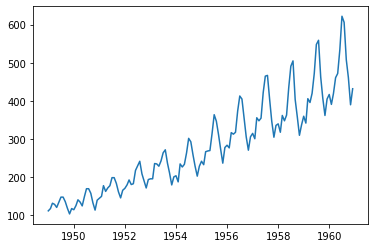

In [7]:
plt.plot(ts)

In [8]:
ts.mean() # Média Geral

280.2986111111111

In [9]:
ts["1960-01-01":"1960-12-01"].mean() # Média do último ano (Mais interessante)

476.1666666666667

In [10]:
media_movel = ts.rolling(window=12).mean() # Valor = Média dos últimos 12 valores
media_movel

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
1950-04-01    128.833333
1950-05-01    129.166667
1950-06-01    130.333333
1950-07-01    132.166667
1950-08-01    134.000000
1950-09-01    135.833333
1950-10-01    137.000000
1950-11-01    137.833333
1950-12-01    139.666667
1951-01-01    142.166667
1951-02-01    144.166667
1951-03-01    147.250000
1951-04-01    149.583333
1951-05-01    153.500000
1951-06-01    155.916667
                 ...    
1958-07-01    376.333333
1958-08-01    379.500000
1958-09-01    379.500000
1958-10-01    380.500000
1958-11-01    380.916667
1958-12-01    381.000000
1959-01-01    382.666667
1959-02-01    384.666667
1959-03-01    388.3

In [11]:
ts[0:12].mean()

126.66666666666667

In [12]:
ts[1:13].mean()

126.91666666666667

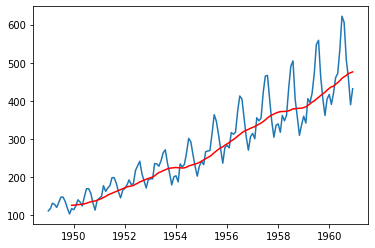

In [13]:
plt.plot(ts)
plt.plot(media_movel, c="red")

In [14]:
previsoes = []
for i in range(1,13):
    superior = len(media_movel) - i
    inferior = superior - 11
    previsoes.append(media_movel[inferior:superior].mean())

previsoes = previsoes[::-1]
previsoes

[405.50757575757575,
 409.90909090909093,
 414.34848484848493,
 418.52272727272725,
 422.75757575757575,
 427.1060606060606,
 431.5,
 436.04545454545456,
 440.49999999999994,
 444.9318181818181,
 449.3787878787878,
 453.52272727272737]

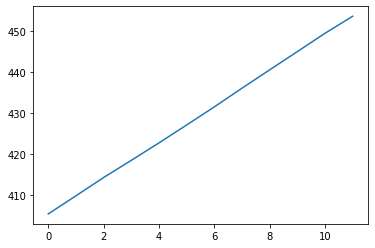

In [15]:
plt.plot(previsoes)